In [1]:
from tensorflow import keras

In [4]:
lenet5 = keras.Sequential()
lenet5.add(keras.layers.Input(shape=(28,28,1)))
lenet5.add(keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same')) # Filer : 6 / 5 X 5 
lenet5.add(keras.layers.AveragePooling2D(pool_size=2))
lenet5.add(keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
lenet5.add(keras.layers.AveragePooling2D(pool_size=2))
lenet5.add(keras.layers.Flatten())
lenet5.add(keras.layers.Dense(120, activation='sigmoid'))
lenet5.add(keras.layers.Dense(84, activation='sigmoid'))
lenet5.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)              

In [6]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('lenet5-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

lenet5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = lenet5.fit(train_scaled, train_target, epochs=20,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb]
                  )

Epoch 1/20


2025-09-17 20:08:23.727339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 12s 6ms/step - loss: 1.0447 - accuracy: 0.6119 - val_loss: 0.7358 - val_accuracy: 0.7168
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6526 - accuracy: 0.7474 - val_loss: 0.6087 - val_accuracy: 0.7697
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5698 - accuracy: 0.7798 - val_loss: 0.5387 - val_accuracy: 0.7927
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5035 - accuracy: 0.8113 - val_loss: 0.4641 - val_accuracy: 0.8279
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4602 - accuracy: 0.8297 - val_loss: 0.4515 - val_accuracy: 0.8322
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4304 - accuracy: 0.8406 - val_loss: 0.4387 - val_accuracy: 0.8367
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4080 - accuracy: 0.8499 - val_loss: 0.4042 - val_accuracy: 0.8501
Ep

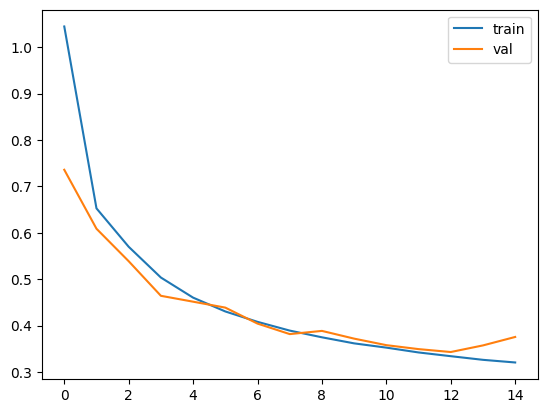

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history["loss"], label='train')
plt.plot(hist.history["val_loss"], label='val')

plt.legend()

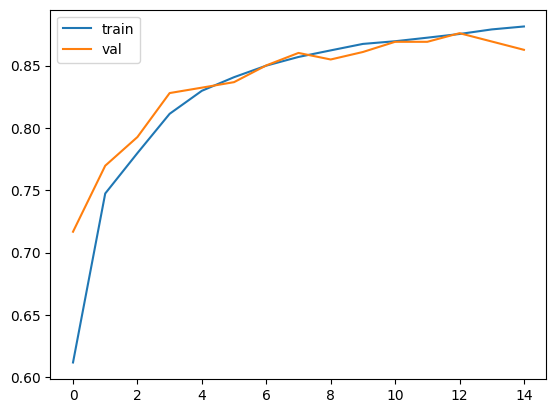

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"], label='train')
plt.plot(hist.history["val_accuracy"], label='val')

plt.legend()